In [26]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

## 할로윈 투자 전략
: 11월에 사서 다음년도 4월에 파는 전략

In [42]:
#연습 : 2001년 11월만 들고오기
kospi = fdr.DataReader("005930")
kospi.loc['2001-11'] 

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2001-11-01,3540,3630,3480,3580,685945,0.031700
2001-11-02,3630,3670,3630,3660,758497,0.022346
2001-11-05,3670,3699,3619,3700,603653,0.010929
2001-11-06,3780,3829,3760,3800,1060255,0.027027
2001-11-07,3820,3829,3770,3810,885396,0.002632
2001-11-08,3810,3870,3800,3860,752072,0.013123
2001-11-09,3900,4010,3860,3970,1308756,0.028497
2001-11-12,4010,4050,3930,4000,470021,0.007557
2001-11-13,3920,4000,3900,4000,600257,0.000000


### 2001~2023년까지 매년 11월에사서 4월에 파는 것을 백테스팅
백테스팅(backtesting) : 특정 기간(2001년부터 2023년까지) 동안의 투자 전략을 시뮬레이션하여 그 성과를 평가하는 과정

In [38]:
cum_rate = 1

for year in range(2001, 2024):
    buy_mon = str(year) + "-11"
    sell_mon = str(year+1) + "-04"
    buy_price = kospi.loc[buy_mon].iloc[0]['Open']
    sell_price = kospi.loc[sell_mon].iloc[-1]['Close']
    rate = sell_price / buy_price
    cum_rate = cum_rate * rate

cum_rate # 누적 수익률 = 약 18배

6.478562633581528

In [12]:
#연평균 복리 수익률 // 약 13%
GAGR = (cum_rate ** (1/24)) - 1
GAGR

0.12886876749473108

- 그냥 가지고 있는거랑 할로윈전략 지키는거랑 뭐가 좋나?

In [15]:
#그냥 보유했을 때 = 8%
simple_rate = kospi.iloc[-1]['Close'] / kospi.iloc[0]['Open']
simple_rate

8.199445983379501

In [17]:
# 연평균 수익률 = 9%
simple_rate **(1/24) -1

0.09162721540710783

- 정말로 11월에 사면 좋은가?

In [20]:
# 연습
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime(year = 2001, month = 11, day = 1) #사는 날
end = start + relativedelta(month = 5) #파는 날

start.strftime("%Y-%m") #원하는 표현 양식

'2001-11'

In [22]:
#검증 함수
def month6(df, start_year = 2001, end_year = 2021, month = 11):

    cum_rate = 1
    
    for year in range(start_year, end_year+1):
        
        start = datetime.datetime(year=year, month=month, day = 1)
        end = start + relativedelta(months = 5)

        buy_mon = start.strftime("%Y-%m")
        sell_mon = end.strftime("%Y-%m")

        buy_price = df.loc[buy_mon].iloc[0]['Open']
        sell_price = df.loc[sell_mon].iloc[-1]['Close']

        rate = sell_price / buy_price
        cum_rate = cum_rate * rate

    return cum_rate

In [24]:
month6(kospi, 2001, 2023, 11) 
# 18% 나옴 즉, 이때까지 잘 했다

18.34184339517867

In [48]:
kospi = fdr.DataReader("KOSPI")

data = {}
for month in range (1, 13):
    returns = month6(kospi, 2002, 2023, month)
    print(month, returns)
    data[month] = returns

1 1.7694783844135098
2 2.730095742488205
3 2.2337400499763063
4 1.7323110264315065
5 0.7370272004196431
6 1.2875603509039595
7 2.0454303104462594
8 1.178520704481425
9 1.3902205272396004
10 1.822451640982792
11 4.15806600255619
12 2.416542312178026


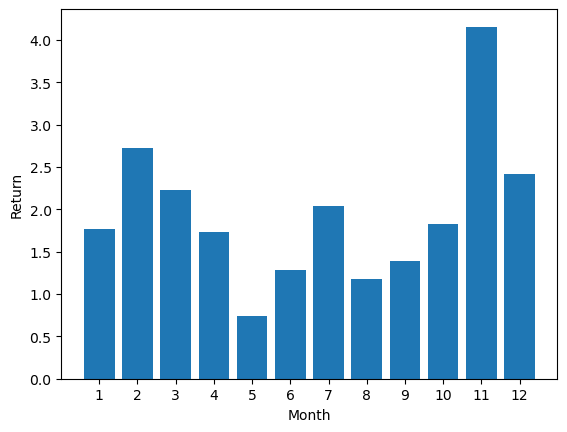

In [52]:
plt.bar(data.keys(), data.values())
plt.xlabel("Month")
plt.ylabel("Return")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.gridaxis = 'y'
plt.show()

## 마켓타이밍
: 하락 구간일땐 무시하고 상승 구간에서만 투자\
: **변동성돌파전략 -> 마켓타이밍 순으로 배움**\
\
-> 10일 평균선 위에 있을때만 투자한다고 가정

In [62]:
df = fdr.DataReader("229200") #코스닥150

In [64]:
df['변동'] = df['High'] - df['Low']
df['전일변동'] = df['변동'].shift(1)
df['목표가'] = df['Open'] + df['전일변동'] * 0.5
df

,Open,High,Low,Close,Volume,Change,변동,전일변동,목표가
Date,,,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67,NaN,NaN
2015-10-02,10135,10159,10135,10148,63224,0.004653,24,67.0,10168.5
2015-10-05,10255,10265,10210,10231,43154,0.008179,55,24.0,10267.0
2015-10-06,10248,10274,10172,10176,42399,-0.005376,102,55.0,10275.5
2015-10-07,10094,10094,9947,9949,21324,-0.022307,147,102.0,10145.0
...,...,...,...,...,...,...,...,...,...
2024-10-17,12945,13010,12820,12900,3745163,-0.000775,190,120.0,13005.0
2024-10-18,12890,12910,12570,12660,8569730,-0.018605,340,190.0,12985.0
2024-10-21,12685,12895,12570,12870,8339814,0.016588,325,340.0,12855.0


In [66]:
df['MA10'] = df['Close'].rolling(window=10).mean()

#시가가 전날 이동평균선 위에 있을 때 매매
df['매매신호'] = df['Open'] > df['MA10'].shift(1)
df['수익률2'] = np.where((df['매매신호'] == 1) & (df['High'] >= df['목표가']), df['Close'] / df['목표가'],1)
df['누적수익률2'] = df['수익률2'].cumprod()
df['누적수익률2'].iloc[-1] #1.56배 -> max_DD를 확인해야함

1.5666715786156653

In [68]:
df['전고점2'] = df['누적수익률2'].cummax()
df['DD2'] = (1 - df['누적수익률2'] / df['전고점2']) * 100
df['DD2'].max() #MDD = 14

14.367365943377418

### 변동성 돌파 전략 
: 거래일의 현재시가 [시가 + 전일 변동폭 * 0.5]를 돌파할 때 매수하고 종가에 매도하는 전략
- 전일 변동폭 = 전일 고가 - 전일 저가

In [82]:
#거래일의 고가가 목표가보다 크거나 같다면 그 목표가에서 매수
#만약 매수가 일어나지 않으면 그대로 유지되므로 그날의 수익률은 1

df['수익률'] = np.where(df['High'] >= df['목표가'], df['Close']/df['목표가'], 1)
df['누적수익률'] = df['수익률'].cumprod() #약 2.7배
df.head()

,Open,High,Low,Close,Volume,Change,변동,전일변동,목표가,MA10,매매신호,수익률2,누적수익률2,전고점2,DD2,수익률,누적수익률,전고점,DD
Date,,,,,,,,,,,,,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67,NaN,NaN,NaN,False,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2015-10-02,10135,10159,10135,10148,63224,0.004653,24,67.0,10168.5,NaN,False,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2015-10-05,10255,10265,10210,10231,43154,0.008179,55,24.0,10267.0,NaN,False,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2015-10-06,10248,10274,10172,10176,42399,-0.005376,102,55.0,10275.5,NaN,False,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2015-10-07,10094,10094,9947,9949,21324,-0.022307,147,102.0,10145.0,NaN,False,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [73]:
#연평균수익률
delta = df.index[-1] - df.index[0]
year = delta.days / 365

CAGR = df['누적수익률'].iloc[-1]**(1/year) -1 #연평균 11.7%

- **'변동성 돌파 전략 > 단순보유' 시각화**

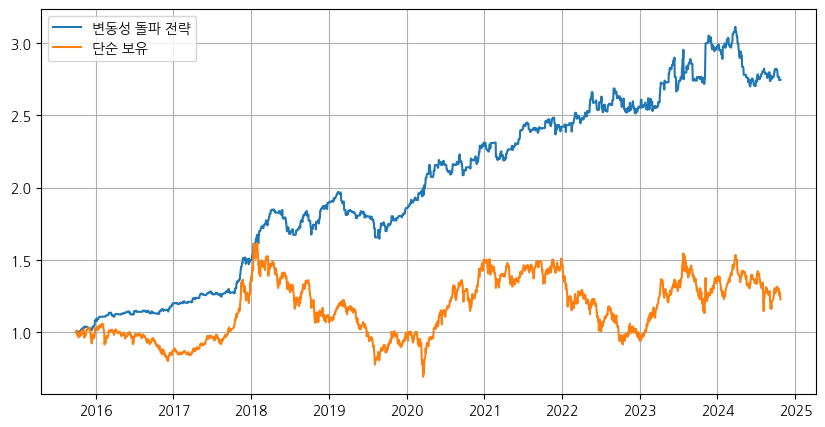

In [76]:
plt.figure(figsize =  (10,5))
plt.plot(df['누적수익률'])
plt.plot(df['Close'] / df['Close'].iloc[0])
plt.grid()
plt.legend(["변동성 돌파 전략", "단순 보유"])
plt.show()

In [78]:
df['전고점'] = df['누적수익률'].cummax()

# 현재 시장에서 얼마나 빠졌는가
df['DD'] = (1 - df['누적수익률'] / df['전고점']) * 100  # 낙폭
max_DD = df['DD'].max()  # 최대 낙폭 계산
max_DD

16.417571317332424

## 